In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

% matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)
pd.set_option('display.precision',9)

In [2]:
df = pd.read_csv('./bw_data.csv')
df.drop(columns=['id'], inplace=True)
df = df[df.loc[:, 'ts'] != 'ts']
df.loc[:, 'bandwidth'] = pd.to_numeric(df.loc[:, 'bandwidth'], errors='coerce')
df['ts'] = pd.to_datetime(df['ts'], unit='s', utc=True)
df.head()

,ts,bandwidth
0,2018-02-14 02:32:13+00:00,56623520
1,2018-02-14 02:27:20+00:00,95733424
2,2018-02-14 01:41:11+00:00,52946496
3,2018-02-14 02:54:40+00:00,61887376
4,2018-02-14 03:31:43+00:00,48975776


In [3]:
df.reset_index(inplace=True)
df.set_index('ts', inplace=True)
df.sort_index(inplace=True)
df = df[(df.index.day > 6) & (df.index.day <= 7) & (df.index.month == 2)]
df.reset_index(inplace=True)

In [4]:
dates = df['ts']
df.loc[:, 'ts'] = pd.to_datetime(dates.dt.strftime('%Y-%m-%d %H:%M:%S'))

df[['year', 'month', 'day', 'hour', 'minute', 'sec']] = \
df['ts'].apply(lambda x: (x.year, x.month, x.day, x.hour, x.minute, x.second)).apply(pd.Series)

In [5]:
df.head()

,ts,index,bandwidth,year,month,day,hour,minute,sec
0,2018-02-07 00:00:00,769460,354146208,2018,2,7,0,0,0
1,2018-02-07 00:00:01,768952,151009688,2018,2,7,0,0,1
2,2018-02-07 00:00:02,770906,115239480,2018,2,7,0,0,2
3,2018-02-07 00:00:03,770713,88881008,2018,2,7,0,0,3
4,2018-02-07 00:00:04,770217,66831624,2018,2,7,0,0,4


In [6]:
df_new = df.drop('ts', axis=1)

In [13]:
df_new.drop('index', axis=1, inplace=True)
df_new.head()

,bandwidth,year,month,day,hour,minute,sec
0,354146208,2018,2,7,0,0,0
1,151009688,2018,2,7,0,0,1
2,115239480,2018,2,7,0,0,2
3,88881008,2018,2,7,0,0,3
4,66831624,2018,2,7,0,0,4


In [14]:
size = int(len(df_new) * 0.70)
train, test = df_new.iloc[0:size, :], df_new.iloc[size:len(df_new), :]
X_train = train.drop('bandwidth', axis=1)
y_train = train.loc[:, 'bandwidth']

X_test = test.drop('bandwidth', axis=1)
y_test = test.loc[:, 'bandwidth']

In [23]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True)

In [24]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([8.97081078e+07, 7.97171196e+07, 7.59194573e+07, ...,
       7.02885242e+07, 1.00442323e+08, 8.52410011e+07])

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

37432108.67703147

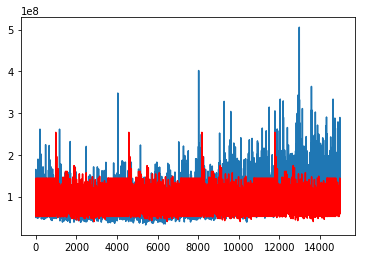

In [26]:
plt.plot(list(y_test))
plt.plot(list(y_pred), color='red')
plt.show()